# CAPSTONE FINAL PROJECT

### Continued from Week 3 

### NEW PART FROM IN [13]

In [1]:
import pandas as pd, numpy as np, requests
from bs4 import BeautifulSoup as bs

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
source = requests.get(url).text
soup = bs(source, 'html')
table = soup.find('table', class_='wikitable sortable')
headers = [header.text.replace('\n','') for header in table.find_all('th')]
data = []
for row in table.find_all('tr'):
    col = row.find_all('td')
    col = [e.text.replace('\n','') for e in col]
    row = [e if e !='Not assigned' else np.nan for e in col if e]
    if len(row)>0:
            data.append(row)
df = pd.DataFrame(data, columns=headers)

In [3]:
df.columns

Index(['Postal code', 'Borough', 'Neighborhood'], dtype='object')

In [4]:
df.rename(columns={"Postal code":"PostalCode"}, inplace = True)
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,NaN,None
1,M2A,NaN,None
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


In [5]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df_clean = df
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,Regent Park / Harbourfront
3,M6A,North York,Lawrence Manor / Lawrence Heights
4,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


In [6]:
df['Neighborhood'] = df['Neighborhood'].str.replace('/',',')

In [7]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park , Harbourfront"
3,M6A,North York,"Lawrence Manor , Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


In [8]:
df.shape

(103, 3)

In [9]:
print('The number of rows in the data set are =', df.shape[0])

The number of rows in the data set are = 103


# PART 2...

In [10]:
data = 'http://cocl.us/Geospatial_data'
df_coordinates = pd.read_csv(data)
df_coordinates.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [11]:
df_coordinates.rename(columns={'Postal Code': 'PostalCode'}, inplace=True)
df_coordinates.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
df_geo = pd.merge(df, df_coordinates, on='PostalCode')
df_geo.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494


In [13]:
df_geo.to_csv(r'C:\Users\Aryam\OneDrive\Desktop\df_geo.csv', index=False)

In [14]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [15]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = ''
LIMIT = 30

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [17]:
toronto_venues = getNearbyVenues(names=df_geo['Neighborhood'],
                                latitudes=df_geo['Latitude'],
                                longitudes=df_geo['Longitude'])

Parkwoods
Victoria Village
Regent Park , Harbourfront
Lawrence Manor , Lawrence Heights
Queen's Park , Ontario Provincial Government
Islington Avenue
Malvern , Rouge
Don Mills
Parkview Hill , Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park , Princess Gardens , Martin Grove , Islington , Cloverdale
Rouge Hill , Port Union , Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate , Bloordale Gardens , Old Burnhamthorpe , Markland Wood
Guildwood , Morningside , West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor , Wilson Heights , Downsview North
Thorncliffe Park
Richmond , Adelaide , King
Dufferin , Dovercourt Village
Scarborough Village
Fairview , Henry Farm , Oriole
Northwood Park , York University
East Toronto
Harbourfront East , Union Station , Toronto Islands
Little Portugal , Trinity
Kennedy Park , Ionview , East Birchmount Park
Bayview Village
Do

In [18]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


In [19]:
toronto_venues.to_csv(r'C:\Users\Aryam\OneDrive\Desktop\toronto_venues.csv', index=False)

In [20]:
print('Number of uniques venue categories: {}'.format(len(toronto_venues['Venue Category'].unique())))

Number of uniques venue categories: 228


In [21]:
# see all unique venue categories
toronto_venues['Venue Category'].unique()

array(['Park', 'Food & Drink Shop', 'Hockey Arena', 'Coffee Shop',
       'Portuguese Restaurant', 'French Restaurant', 'Pizza Place',
       'Bakery', 'Breakfast Spot', 'Distribution Center', 'Spa',
       'Restaurant', 'Gym / Fitness Center', 'Historic Site',
       'Farmers Market', 'Chocolate Shop', 'Pub', 'Performing Arts Venue',
       'Dessert Shop', 'Mexican Restaurant', 'Yoga Studio', 'Café',
       'Theater', 'Event Space', 'Ice Cream Shop', 'Boutique',
       'Furniture / Home Store', 'Vietnamese Restaurant',
       'Clothing Store', 'Accessories Store', "Women's Store",
       'Arts & Crafts Store', 'Gift Shop', 'Miscellaneous Shop',
       'Sushi Restaurant', 'Italian Restaurant', 'Creperie', 'Beer Bar',
       'Burrito Place', 'Hobby Shop', 'Diner', 'Fried Chicken Joint',
       'Discount Store', 'Japanese Restaurant', 'Burger Joint',
       'Juice Bar', 'Bank', 'Sandwich Place', 'Fast Food Restaurant',
       'Caribbean Restaurant', 'Baseball Field', 'Gastropub', 'Pharma

In [22]:
# converting to one hot encoding

t_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

t_onehot['Neighborhoods'] = toronto_venues['Neighborhood'] 

fixed_columns = [t_onehot.columns[-1]] + list(t_onehot.columns[:-1])
t_onehot = t_onehot[fixed_columns]

print(t_onehot.shape)
t_onehot.head()

(1329, 229)


,Neighborhoods,Accessories Store,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Stadium,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,College Stadium,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Drugstore,Eastern European Restaurant,Electronics Store,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Hotel,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Insurance Office,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Motel,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Opera House,Optical Shop,Organic Grocery,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Pool,Portuguese Restaurant,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Sculpture Garden,Seafood Restaurant,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Soccer Field,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [23]:
# number of venue categories 

total = t_onehot.sum()

In [24]:
total

Neighborhoods                    ParkwoodsParkwoodsVictoria VillageVictoria Vil...
Accessories Store                                                                1
Airport                                                                          2
Airport Food Court                                                               1
Airport Gate                                                                     1
Airport Lounge                                                                   2
Airport Service                                                                  3
Airport Terminal                                                                 2
American Restaurant                                                             14
Antique Shop                                                                     1
Aquarium                                                                         1
Art Gallery                                                                      9
Art 

In [25]:
total=pd.DataFrame(total)

In [26]:
total

,0
Neighborhoods,ParkwoodsParkwoodsVictoria VillageVictoria Vil...
Accessories Store,1
Airport,2
Airport Food Court,1
Airport Gate,1
Airport Lounge,2
Airport Service,3
Airport Terminal,2
American Restaurant,14
Antique Shop,1


In [27]:
total.rename(columns={0:'Total'},inplace = True)

In [28]:
total = total[1:]

In [29]:
hf = total[total['Total']>20]

In [30]:
# We can see that the beverages market is donimated by Cafés and Coffee Shops

hf

,Total
Bakery,29
Bank,22
Café,70
Coffee Shop,102
Grocery Store,21
Italian Restaurant,28
Park,48
Pizza Place,35
Restaurant,38
Sandwich Place,32


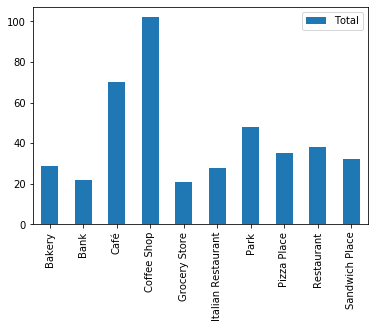

In [31]:
hf.plot(kind='bar')

In [32]:
# Let us find out number of Tea Shops

Tea = toronto_venues[toronto_venues['Venue Category'].str.contains("Tea" or "tea")]
print(Tea.shape)
Tea

(13, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
95,"Garden District, Ryerson",43.657162,-79.378937,DAVIDsTEA,43.656973,-79.381040,Tea Room
294,Central Bay Street,43.657952,-79.387383,Chatime 日出茶太,43.655542,-79.384684,Bubble Tea Shop
440,"Fairview , Henry Farm , Oriole",43.778517,-79.346556,DAVIDsTEA,43.777593,-79.345089,Tea Room
493,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752,Sharetea,43.640176,-79.379606,Bubble Tea Shop
570,"The Danforth West , Riverdale",43.679557,-79.352188,Tsaa Tea Shop,43.677769,-79.351304,Bubble Tea Shop
588,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576,DAVIDsTEA,43.646506,-79.380145,Tea Room
677,"Commerce Court , Victoria Hotel",43.648198,-79.379817,DAVIDsTEA,43.646506,-79.380145,Tea Room
792,Willowdale,43.770120,-79.408493,Ten Ren's Tea Time 喫茶新饌,43.769575,-79.412597,Bubble Tea Shop
1021,"Runnymede , Swansea",43.651571,-79.484450,DAVIDsTEA,43.650380,-79.478819,Tea Room
1159,"Steeles West , L'Amoreaux West",43.799525,-79.318389,Presotea,43.799397,-79.319014,Bubble Tea Shop


In [33]:
Tea.to_csv(r'C:\Users\Aryam\OneDrive\Desktop\Tea.csv', index=False)

As we can see, there are a lot of Cafés and Coffee Shops compared to Tea Shops
Let's try to find out, if someone wants to open a tea shop, where should it be situated?

#### Visualizing Tea Shops in Toronto

In [34]:
map_tea = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,venue in zip(Tea['Venue Latitude'],Tea['Venue Longitude'],Tea['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='black',
    fill=True,
    fill_color='#d0f0c0',
    fill_opacity=0.7,
    parse_html=False).add_to(map_tea)
map_tea

#### Visualizing Coffee Shops in Toronto

For simplicity, and to reduce redundancy, I am considering Coffee Shop and Café as same.

In [35]:
toronto_venues['Venue Category'] = toronto_venues['Venue Category'].str.replace('Café', 'Coffee Shop')

In [36]:
# Let us find out number of Coffee Shops

Coffee = toronto_venues[toronto_venues['Venue Category'].str.contains("Coffee Shop")]
print(Coffee.shape)
Coffee

(172, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
8,"Regent Park , Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
19,"Regent Park , Harbourfront",43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
20,"Regent Park , Harbourfront",43.654260,-79.360636,Starbucks,43.651613,-79.364917,Coffee Shop
22,"Regent Park , Harbourfront",43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
27,"Regent Park , Harbourfront",43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
30,"Regent Park , Harbourfront",43.654260,-79.360636,Dark Horse Espresso Bar,43.653081,-79.357078,Coffee Shop
33,"Regent Park , Harbourfront",43.654260,-79.360636,Caffe Furbo,43.649970,-79.358849,Coffee Shop
41,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop
52,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,Neo Coffee Bar,43.660140,-79.385870,Coffee Shop


In [37]:
Coffee.to_csv(r'C:\Users\Aryam\OneDrive\Desktop\Coffee.csv', index=False)

In [38]:
map_coffee = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,venue in zip(Coffee['Venue Latitude'],Coffee['Venue Longitude'],Coffee['Venue']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='black',
    fill=True,
    fill_color='#6f4e37',
    fill_opacity=0.7,
    parse_html=False).add_to(map_coffee)
map_coffee

In [39]:
Coffee.columns

Index(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude',
       'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [40]:
k=4
Coffee_clustering = Coffee.drop(['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue', 'Venue Category'],1)
kmeans = KMeans(n_clusters = k,random_state=0).fit(Coffee_clustering)
kmeans.labels_
Coffee.insert(0, 'Cluster Labels', kmeans.labels_)
Coffee

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,3,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
8,0,"Regent Park , Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
19,0,"Regent Park , Harbourfront",43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
20,0,"Regent Park , Harbourfront",43.654260,-79.360636,Starbucks,43.651613,-79.364917,Coffee Shop
22,0,"Regent Park , Harbourfront",43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
27,0,"Regent Park , Harbourfront",43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
30,0,"Regent Park , Harbourfront",43.654260,-79.360636,Dark Horse Espresso Bar,43.653081,-79.357078,Coffee Shop
33,0,"Regent Park , Harbourfront",43.654260,-79.360636,Caffe Furbo,43.649970,-79.358849,Coffee Shop
41,2,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763,Tim Hortons,43.719427,-79.467995,Coffee Shop
52,0,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494,Neo Coffee Bar,43.660140,-79.385870,Coffee Shop


In [41]:
Coffee.groupby(['Cluster Labels']).count()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Cluster Labels,,,,,,,
0,124,124,124,124,124,124,124
1,16,16,16,16,16,16,16
2,16,16,16,16,16,16,16
3,16,16,16,16,16,16,16


In [42]:
# creating the map
cmap_km = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

# setting color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding markers to the map
markers_colors = []
for lat, lon, neighbourhood, cluster in zip(Coffee['Venue Latitude'], Coffee['Venue Longitude'], Coffee['Neighborhood'], Coffee['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(cmap_km)
       
cmap_km

### SUGGESTION:

In my opinion, Cluster 1 should be chosen to set up a new Tea Shop, because it has very less coffee shops, and a single tea shop (from map_tea). Moreover, the coffee shops are scattered and there is enough area with no coffee or tea shop in the vicinity. Therefore, this area has a benefit of low competition compared to other areas in the map.